# Probability concepts

In this notebook we will go over some essential concepts in probability, such as **events, random variables, probability and probability distribution**. They seem simple but also sometimes are quite confusing to someone new to probability.



## Sample space, outcomes, events
There are things in lif that are a bit *random* in the sense that we do not know the outcome with certainty before it occurs, so we reason about the uncertainties with tools of probability. 

For an experiment with uncertain outcomes, we denote all possible outcomes as a *set* $S$, and call it the *sample space*. The actual outcome(s) will belong to this set.

An *event* $E$ is a subset of $S$ (i.e. $E \subseteq S$) and we would say event $E$ *occurred* if the actual outcome(s) belongs to $E$ (i.e. $s_{actual} \in E$).

To make this concrete, let's look at a single roll if a 6-sided dice.

The sample space $S$ in this case is a set of 6 elements: $S=\{\text{Face 1 shows up}, \text{Face 2 shows up}, \dots, \text{Face 6 shows up}\}$

We could define an event however we want. For exampple we can define event $E_1$ to be the event face 5 shows up, define an event $E_2$ to be the event "a face with even number shows up", and define an event $E_3$ to be the event "the face shows up is not 2 or 3". They are expressed as follows:

$$E_1 =\{\text{Face 5 shows up}\}$$
$$E_2 =\{\text{Face 2 shows up},\text{Face 4 shows up},\text{Face 6 shows up}\}$$
$$E_3^c =\{\text{Face 2 shows up}, \text{Face 3 shows up}\}, E_3=S-E_3^c$$

In the above, we introduced the notation $^c$ to mean the complementation of a set. Specifically, it means $E_3^c$ occurs if and only if $E_3$ does not occur. 

A few other notations on set algebra might be helpful to review: https://en.wikipedia.org/wiki/Algebra_of_sets

## Probability

"Probability is the measure of the likelihood that an event will occur. Probability is quantified as a number between 0 and 1, where, loosely speaking, 0 indicates impossibility and 1 indicates certainty." - Wikipedia

We can interpret probability as the frequency of certain event occur if we do the experiment many many times. This long-run frequency view is the *frequentist* view. Or we can interpret probability as our degree of belief in the event, which is useful for experiments that are not possible to repeat over and over. This is the *Bayesian* view.

We use $P(A)$ to denote the probabily that event $A$ occurs and define probability with the following axioms:
- $P(S)=1$, $P(\emptyset)=0$
- Disjoint/mutually exclusive events, $A_1, A_2, \dots$ are defined such that $A_i \cap A_j = \emptyset$ for $i\neq j$. And we have 
$$P \left( \bigcup_{i=1}^{\infty}A_i \right) = \sum_{i=1}^{\infty}P(A_i) $$


Following the definiiton we have properties:
- $P(A) + P(A^c)=1$
- $A \subseteq B \Rightarrow P(A) \leq P(B)$
- $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

The last property can be generalized into the [inclusion-exclusion theorem](https://en.wikipedia.org/wiki/Inclusion%E2%80%93exclusion_principle) for more than two sets.

Let's try to find the probability of $E_1$, $E_2$ and $E_3$ in our dice example. Assume our dice is fair, meaning each face will show up equally likely. Denote $A_i$ to be the outcome face $i$ shows up, we have $ \sum_{i=1}^6 A_i = 1 $ and $A_1=A_2= \dots = A_6$, therefore $A_i=\frac{1}{6}$. 

The fairness of the dices gives the problem **symmetry** (i.e. all $A_i$s are equal). In addition $A_i$s are **mutually exclusive** (a roll of a single dice cannot possibly take more than one value). Therefore we can resort to counting the **number of occurences** for calculating probability:

$$P(E) = \frac{\text{number of outcomes in E}}{\text{number of all possible outcomes}}$$

Thus we have $P(E_1)=\frac{1}{6}$, $P(E_2)=\frac{3}{6}=\frac{1}{2}$ and $P(E_3)=\frac{4}{6}=\frac{2}{3}$

The assumption/condition that **all the outcomes are equally likely and mutually exclussive** forms the basis for couting and combinatorics that we will go over in the next section.

## Random variable

In the discussion above, we have $P(\cdot)$ notation for probability, it is a function that takes an event as input and outputs a real value that is between 0 and 1.

In order to fully utilize the tools we have in calculus, it would be nice to have the input of $P(\cdot)$ be real valued. And random variable comes to resume.

**A random variable maps sample space $S$ to real numbers $\mathbb{R}$.** That's it. The exact mapping is up to use to define. 

![rv.png](rv.png)
(Image credit: *Blitzstein, Joseph K., and Jessica Hwang. Introduction to probability. CRC Press, 2014.*)

For example, we could define a random variable $X$ (we usually use capital letter to denote a random variable) to take on value $i$ if the dice face $i$ shows up.

For example, if we roll the dice twice, we could define a random variable $Y$ to take on the value $i_1+i_2$, where $i_1$ and $i_2$ are the dice value of the first and second roll respectively. Thus very conveniently $Y=7$ represents the outcomes of $(i_1, i_2)$ takes on values of $\{(1,6), (6,1), (2, 5), (5, 2), (3,4), (4,3) \})$ from the two rolls. 

## Probability distribution

Now that we have both the input and output of $P(\cdot)$ as real numbers, it is natual to think of $P(\cdot)$ as function that describes the probability of random variable taking of various values. More concretely $P(X=k)=P(k)=f_X(k)$.

For our dice example above, because $X$ and $Y$ takes on discrete values, they are called discrete random variables. Their $P(\cdot)$ functions are called probability mass functions (PMF). Because at each of the value $k$ the variable takes, P(k) is indeed a probability. This is in contrast to the continuous version of the random variables. 

For continuous random variables, the probability of taking on an exact real number is zero, and it is more useful to talk about the probabiliy for taking on values of certain interval, so the equivalent of $P(\cdot)$ there is called probability density function (PDF).

To get some feeling about PMF, let's calculate the PMF for $Y$. 

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

p_y = defaultdict(int)
for i in range(1, 7):
    for j in range(1, 7):
        s = i+j
        p_y[s] +=1

In [2]:
p_y

defaultdict(int,
            {2: 1,
             3: 2,
             4: 3,
             5: 4,
             6: 5,
             7: 6,
             8: 5,
             9: 4,
             10: 3,
             11: 2,
             12: 1})

We can see that $Y$ only takes on certain values (2 to 12), this set of values are called the *support*, outside of the support $P(Y)=0$. To get the probability, we should divide the count outcomes by the total count of all possible outcomes.

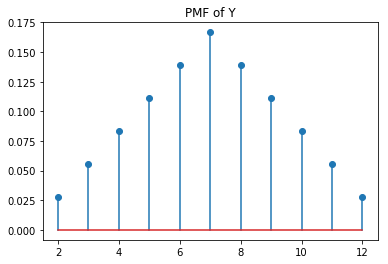

In [3]:
x,y =zip(*[(k, v/36) for k,v in p_y.items()])
plt.stem(x,y)
plt.title('PMF of Y')